# Python SDK - Examples 
## Face detection
___

이 예제는 ALFaceDetection을 사용하여 face detection 과 face tracking을 가능하게 하였다.

## ALFaceDetection
___
___
## What it does
___

ALFaceDetection 은 robot의 앞에 있는 얼굴들을 detect 하고 선택적으로 recognize 하려 하는 vision module 이다.

## How it works 
___
ALFaceDetection 은 OMRON에 의해 제공된 face detection/recognition solution을 기반으로 한다.



### Face detection
___
Face detection은 face를 detect 하고, 중요한 face features(눈, 코, 입)의 angular coordinate's list 뿐만 아니라 face의 positions를 제공한다.



### Recognition 
___
로봇으로 하여금 사람들을 detect 하는 것 뿐만 아니라 recognize를 하여야 하므로, learning 하는 단계가 필수적이다.

더 자세히 알고 싶다면 참조 : http://doc.aldebaran.com/2-4/naoqi/peopleperception/alfacedetection.html#alfacedetection-learning-stage 

#### Threshold
각 이름은 0과 1 사이의 일치하는 점수와 관련이 있다. 점수가 높으면 더 확실성이 높다. 주어진 threshold 값보다 높은 점수를 받은 결과만 고려가 되어진다. 즉, ALFaceDetection을 다소 엄격하게 구성할 수 있다는 뜻이다. 

낮은 threshold값은 결과를 often 하게 결과를 return 하지만 틀릴 가능성이 높고, 높은 threshold값은 가장 높은 확실성을 띄는 일치항목들만 return하여 오류의 위험을 줄이지만 결과를 얻는 것이 어려울 수 있다.

#### Temporal filter
추가적으로, recognition을 사용하여 더 높은 수준의 특징들을 쉽게 build하도록 하는 temporal filter의 output이 있다. 

사실 우리는 로봇이 계속해서 "Hello, OOO!" 하는 것을 원하지 않기 때문에, 누군가의 이름이 처음 인식되었을때만 출력되고 short-term momory에 남게 된다.

이 memory는 로봇에 의해 얼굴이 더이상 recognized되지 않는 것 뿐만 아니라 detected되지 않을 때까지 유지 된다.

얼굴을 감지하지 않고 4초 이상 지나면, short-term momery가 지워지고, 다시 OOO이라는 이름을 가진 사람을 만나게 된다면 "Hello, OOO!" 을 출력하게 된다.

이것은 Choreghraphe 'Face Reco' box 에서 사용되는 출력이다.

#### FaceDetected Event
___

ALFaceDetection이 시작되어지면, event인 FaceDetected()는 아래와 같이 구성된 값을 return 한다.

In [1]:
FaceDetected =
[
  TimeStamp,
  [ FaceInfo[N], Time_Filtered_Reco_Info ],
  CameraPose_InTorsoFrame,
  CameraPose_InRobotFrame,
  Camera_Id
]

SyntaxError: invalid syntax (<ipython-input-1-de087762c7eb>, line 1)

#### TimeStamp 
: 이는 detection을 수행하는데 사용된 image의 time stamp이다.

In [ ]:
TimeStamp =
[
  TimeStamp_Seconds,
  Timestamp_Microseconds
]

#### FaceInfo
: detected된 각각의 얼굴마다, 하나의 faceinfo field를 가진다.

In [ ]:
FaceInfo =
[
  ShapeInfo,
  ExtraInfo[N]
]

#### ShapeInfo
: 얼굴에 대한 shape 정보

In [ ]:
ShapeInfo =
[
  0,
  alpha,
  beta,
  sizeX,
  sizeY
]

=> alpha 와 beta는 camera 각도로, 얼굴의 위치를 나타낸다.

=> sizeX 와 sizeY는 camera 각도에서의 얼굴의 size를 나타낸다.

#### ExtraInfo 
: 얼굴에 대한 shape 정보.

In [ ]:
ExtraInfo =
[
  faceID,
  scoreReco,
  faceLabel,
  leftEyePoints,
  rightEyePoints,
  unused, # for backward-compatibility issues
  unused,
  nosePoints,
  mouthPoints
]

=> faceID : 얼굴의 ID number를 나타낸다.

=> scoreReco : recognition 과정에 의해 return된 score를 나타낸다. (높은 score일수록, 정확성 올라감)

=> faceLabel : 얼굴이 recognized 되었을 때의 recognized된 얼굴의 이름을 나타낸다.

=> leftEyePoints, RightEyePoints : 눈들에 대한 흥미로운 position들을 제공한다. (camera 각도값으로 제공됨)

In [ ]:
EyePoints =
[
  eyeCenter_x,
  eyeCenter_y,
  noseSideLimit_x,
  noseSideLimit_y,
  earSideLimit_x,
  earSideLimit_y,
  always_zero, # for backward-compatibility issues
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero
]

=> nosePoints : 이는 코에 대한 흥미로는 position들을 제공한다. (camera 각도값으로 제공됨)

In [ ]:
NosePoints =
[
  bottomCenterLimit_x,
  bottomCenterLimit_y,
  bottomLeftLimit_x,
  bottomLeftLimit_y,
  bottomRightLimit_x,
  bottomRightLimit_y
]

=> mouthPoints : 이는 입에 대한 흥미로는 position들을 제공한다. (camera 각도값으로 제공됨)

In [ ]:
MouthPoints =
[
  leftLimit_x,
  leftLimit_y,
  rightLimit_x,
  rightLimit_y,
  topLimit_x,
  topLimit_y,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero,
  always_zero
]

#### Time_Filtered_Reco_Info 
: 이는 아래의 것들과 동일하다.. 

[ ] : 새로운것이 없을 때

[2, [faceLabel ] ] : recognized된 얼굴이 한 개인 경우

[3, [faceLabel0, ... , faceLabelP ] ] : recognized된 얼굴이 여러 개인 경우

[4] 얼굴이 recognized되지 않고 8초이상 detected된 경우. 이러한 결과를 얻는 것은 얼굴 학습을 원할때 하기 위한 suggestion이지만, 언제나 로봇이 쳐다보고 있는 얼굴의 경우에서만 recognition이 적용된다는 점을 유의해야한다.

#### CameraPose_InTorsoFrame
: FRAME_TORSO 에서 image가 촬영되었을 때의 Position6D 에 대해 나타낸다.



#### CameraPose_InRobotFrame
: FRAME_ROBOT 에서 image가 촬영되었을 때의 Position6D 에 대해 나타낸다.


#### Camera_Id
: detection에 사용된 camera의 ID를 나타낸다. (0은 top camera, 1은 bottom camera).


___
*FRAME_TORSO

: 이는 로봇의 torso reference에 부착되어, 로봇이 움직일때 같이 움직이고 로봇이 기울어지면 방향을 바꾼다. 이 공간은 torso frame에 의미가 있기에, 아주 local한 task들을 처리할때 유용하다.

*FRAME_ROBOT

: ALMotion에서 사용하는 3개의 spatial references 중 하나이다. 이는 수직 z축 주위로 투영된 2피트 positions의 평균이다. 이 공간은 x축이 언제나 앞으로 향하므로 natural ego-centric reference를 제공하기 때문에 유용하다.

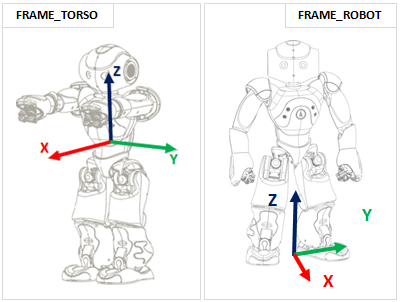

*Position6D

A Position6D는 3-translations(in meter) 과 3-rotation(in radian)으로 구성된 6차원 vector이다.

$ Position6D = \left[\begin{array}{c} x \\ y \\ z \\ w_x \\ w_y \\ w_z \end{array}\right]$

with:

$(x, y, z)$: translation part (3 scalars)
$(w_x, w_y, w_z)$: rotation part (3 scalars)
Position6D versus Transform

The following equation shows how to compute a transform from a position6D.

$ Position6D = \left[\begin{array}{c} x \\ y \\ z \\ w_x \\ w_y \\ w_z \end{array}\right]$ => $ H = \left[\begin{array}{cc} R & r \\ 0_{1,3} & 1 \end{array}\right]$ with $ \left\{\begin{array}{l} R = R_z(w_z) R_y(w_y) R_x(w_x) \\ r = \left[\begin{array}{ccc}x & y & z \end{array}\right]^t \end{array}\right.$

Basic Example: represente a solid which position is x=1.0, y=-0.5, z=0.4 ad his orientation is 10 degree around x axis. 10 degree is equal to 0.1745 radian. In this basic case, it is very simple to use Position6D.

$ Position6D = \left[\begin{array}{c} +1.0 \\ -0.5 \\ -0.4 \\ 0.1745 \\ 0.0 \\ 0.0 \end{array}\right]$ <=> $ Transform = \left[\begin{array}{cccc} 1 & 0 & 0 & +1.0 \\ 0 & 0.9848 & -0.1736 & -0.5 \\ 0 & 0.1736 & 0.9848 & +0.4 \\ 0 & 0 & 0 & 1 \end{array}\right]$



## Performances and Limitations
___
### Detection
___
#### Performances

=> Face width : image 에서 최소 20 pixel. 성인의 경우, QVGA 영상에서 2m, VGA에서 4m 에 해당한다.

=> Tilt / Pan : 최대 +/- 15° ( 0°는 카메라 정면을 향한 얼굴에 해당된다.)

=> Image 평면에서의 Rotation : 최대 +/- 45°

#### Limitations

=> Lighting(조명) : face detection은 office lighting conditions(100 ~ 500 lux)에서 테스트된 것이다.

detection이 제대로 않는다고 생각되면 모니터 interface를 통해 camera auto-gain을 활성화하거나 수동으로 camera contrast를 조정해야한다.

### Recognition
___

#### Performances
=> Face width

: image 에서 최소 20 pixel. 그러나 더 나은 learning과 recognition results를 위해서는 최소 40 pixel의 크기를 권장한다.

누군가의 얼굴을 학습할때, 중립적인 얼굴은 슬픔과 행복 사이에 있기 때문에 subject는 얼굴을 camera에 향하고, 중립적인 얼굴을 유지해야 한다. 그렇지 않으면, 만약 학습과정에서 누군가 웃고있을때 그 사람이 슬프다고 인식하는 것이 더 힘들것이다.

때때로, 장소의 변화 혹은 머리변화에 따라 알던 얼굴이 recognize하기 어려워질 수 있다. rubustness(견고성)을 향상 시키기 위해서는 reinforcement process가 추가되었다. 만약 누군가 recignized되지 않는다면 혹은 다름사람으로 오인한다면, 다시 그 사람에 대해 학습한다. 이 학습은 그 사람의 데이터베이스에 추가 될 것이다. 몇일 뒤, 당신은 더 신뢰할 수 있는 recognition을 얻을 수 있을 것이다.

#### Limitations
=> recognition은 Pan/Tilt/ rotation, maximal distance 보다 덜 강력하다. 이는 Recognition algorithm이 인식할 사람의 3D 표현식이 없고, keypoints 사이의 distance와 같은 정보를 사용하기 때문이다. 만약 머리를 돌리면, 이 거리들의 비율이 수정된다.

### Learning
___
#### Performances
: 학습단계는 5개의 연속된 images를 얻어, 각 이지에서 사용자의 얼굴을 학습하려고 한다.

#### Limitations
: 학습단계는 시야에서 발견된 가장 큰 얼굴만을 고려한다.

## Getting Started
___
### Detection
___

=> ALFaceDetection이 무엇을 할 수 있는지를 느끼려면, 모니터를 사용하고 vision plugin을 실행해라. Face-detection checkbox를 활성화하고, 카메라 획득을 시작해라. 그런 다음 얼굴을 카메라에 표시하거나 얼굴이 있는 사진을 표시하는 경우 - 모니터는 감지된 얼굴을 파란색 십자가들로 report해야한다. 

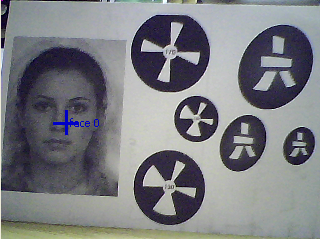

=> 또다른 face detection 방법으로는 Choregraphe에서 'Face Tracker' box를 실행시키면 된다. 이럴 경우, 로봇은 본인의 시야의 중앙에 detected된 얼굴을 유지시키려고 한다.

### Learning stage for recognition
___

: 학습 과정은 API의 'learnFace' bound method 혹은 user-friendly interface인 choregraphe의 'Learn Face' box를 통해 이루어진다.

=> box를 클릭하고 그사람의 이름을 들어간 후, 이 사람을 로봇앞에 5초동안 얼굴을 위치시킵니다.

=> 그 다음로봇의 눈이 파란색이 될 동안 학습과정이 실행되어진다.

> 로봇의이 올바른 조건(얼굴의 부분에 그림자가 없거나, 백라이트가 없거나, 사람이 너무 멀지 않을 경우)에서 얼굴을 본 경우, 로봇의 눈은 1초 안에 초록색으로 변한다 

> 몇 초 뒤에도 로봇의 눈이 아직 파란색이라면, 사람은 학습 조건을 바꾸기 위해 이동해야만 한다.

>Note : algorithm은 학습 과정을 위해서 detection에 필요한 조건보다 더 나은 조건들을 요구한다.

>Note : 학습 단계와 함께 Face Tracker box를 동시에 실행할 수 있으므로, 학습할 얼굴은 항상 로봇의 시야 가운데에 위치한다.